In [3]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
print(os.getcwd())

/Users/damienlo/Desktop/University/CS 334/Project


In [55]:
meta = pd.read_csv('/Users/damienlo/Desktop/raw_metadata.csv')
meta.sort_values(by=['full_path'], ascending=True)
meta

,full_path,dob,photo_taken,gender,face_score,second_face_score,face_location
0,00/10049200_1891-09-16_1958.jpg,690933,1958,0.0,5.254819,NaN,[[126.86918793 111.11053944 267.89702434 252.1...
1,00/10110600_1985-09-17_2012.jpg,725267,2012,1.0,3.693129,NaN,[[217.68141675 129.03901899 305.32381451 216.6...
2,00/10126400_1964-07-07_2010.jpg,717525,2010,1.0,2.284806,0.966069,[[242.32912564 423.41596987 309.35669223 490.4...
3,00/1013900_1917-10-15_1960.jpg,700458,1960,1.0,4.136101,NaN,[[ 80.87097799 90.92035024 170.83932822 180.8...
4,00/10166400_1960-03-12_2008.jpg,715947,2008,1.0,3.870919,NaN,[[ 40.70425392 120.35276175 398.24253916 477.8...
...,...,...,...,...,...,...,...
62323,99/9799_1960-06-22_2012.jpg,716049,2012,0.0,3.964189,NaN,[[183.36877359 163.10113208 364.81754717 344.5...
62324,99/9811999_1953-06-14_2004.jpg,713484,2004,0.0,2.432975,NaN,[[141.68 198. 394.24 450.56]]
62325,99/981199_1954-12-30_2006.jpg,714048,2006,1.0,3.004349,NaN,[[178.12 47.304 261.632 130.816]]
62326,99/9863599_1948-08-13_1963.jpg,711718,1963,0.0,0.779260,NaN,[[212.08 134.64 274.56 197.12]]


In [56]:
meta.describe()

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,dob,photo_taken,gender,face_score,second_face_score
count,62328.000000,62328.000000,59685.000000,6.232800e+04,4096.000000
mean,716681.030035,1998.765627,0.788523,-inf,2.009050
std,10832.627367,20.907937,0.408359,NaN,0.981277
min,4077.000000,1940.000000,0.000000,-inf,0.731419
25%,710673.000000,1992.750000,1.000000,NaN,1.164925
50%,719269.000000,2009.000000,1.000000,2.463949e+00,1.839065
75%,724702.250000,2012.000000,1.000000,3.760014e+00,2.655757
max,736011.000000,2015.000000,1.000000,7.081268e+00,5.463147


In [59]:
def convertDOB(meta_data):
    meta_data['birth_year'] = meta_data['dob'].apply(
        lambda x: (datetime.fromordinal(int(x)) + timedelta(days=x % 1) - timedelta(days=366)).year if x > 0 else None
    )

def calculateAge(data):
    data['age'] = data['photo_taken'] - data['birth_year']

convertDOB(meta)
calculateAge(meta)
meta

,full_path,dob,photo_taken,gender,face_score,second_face_score,face_location,birth_year,age
0,00/10049200_1891-09-16_1958.jpg,690933,1958,0.0,5.254819,NaN,[[126.86918793 111.11053944 267.89702434 252.1...,1891,67
1,00/10110600_1985-09-17_2012.jpg,725267,2012,1.0,3.693129,NaN,[[217.68141675 129.03901899 305.32381451 216.6...,1985,27
2,00/10126400_1964-07-07_2010.jpg,717525,2010,1.0,2.284806,0.966069,[[242.32912564 423.41596987 309.35669223 490.4...,1964,46
3,00/1013900_1917-10-15_1960.jpg,700458,1960,1.0,4.136101,NaN,[[ 80.87097799 90.92035024 170.83932822 180.8...,1917,43
4,00/10166400_1960-03-12_2008.jpg,715947,2008,1.0,3.870919,NaN,[[ 40.70425392 120.35276175 398.24253916 477.8...,1960,48
...,...,...,...,...,...,...,...,...,...
62323,99/9799_1960-06-22_2012.jpg,716049,2012,0.0,3.964189,NaN,[[183.36877359 163.10113208 364.81754717 344.5...,1960,52
62324,99/9811999_1953-06-14_2004.jpg,713484,2004,0.0,2.432975,NaN,[[141.68 198. 394.24 450.56]],1953,51
62325,99/981199_1954-12-30_2006.jpg,714048,2006,1.0,3.004349,NaN,[[178.12 47.304 261.632 130.816]],1954,52
62326,99/9863599_1948-08-13_1963.jpg,711718,1963,0.0,0.779260,NaN,[[212.08 134.64 274.56 197.12]],1948,15


In [61]:
meta = meta.dropna(subset=["gender"])
def fill_mean_age(df):
    mean_age = df['age'].mean()
    df['age'] = df['age'].fillna(mean_age)
    return df

meta = fill_mean_age(meta)
meta

/var/folders/rs/gsq5ghk14g7f0mm959z5c0fr0000gn/T/ipykernel_74144/572880148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].fillna(mean_age)


,full_path,dob,photo_taken,gender,face_score,second_face_score,face_location,birth_year,age
0,00/10049200_1891-09-16_1958.jpg,690933,1958,0.0,5.254819,NaN,[[126.86918793 111.11053944 267.89702434 252.1...,1891,67
1,00/10110600_1985-09-17_2012.jpg,725267,2012,1.0,3.693129,NaN,[[217.68141675 129.03901899 305.32381451 216.6...,1985,27
2,00/10126400_1964-07-07_2010.jpg,717525,2010,1.0,2.284806,0.966069,[[242.32912564 423.41596987 309.35669223 490.4...,1964,46
3,00/1013900_1917-10-15_1960.jpg,700458,1960,1.0,4.136101,NaN,[[ 80.87097799 90.92035024 170.83932822 180.8...,1917,43
4,00/10166400_1960-03-12_2008.jpg,715947,2008,1.0,3.870919,NaN,[[ 40.70425392 120.35276175 398.24253916 477.8...,1960,48
...,...,...,...,...,...,...,...,...,...
62323,99/9799_1960-06-22_2012.jpg,716049,2012,0.0,3.964189,NaN,[[183.36877359 163.10113208 364.81754717 344.5...,1960,52
62324,99/9811999_1953-06-14_2004.jpg,713484,2004,0.0,2.432975,NaN,[[141.68 198. 394.24 450.56]],1953,51
62325,99/981199_1954-12-30_2006.jpg,714048,2006,1.0,3.004349,NaN,[[178.12 47.304 261.632 130.816]],1954,52
62326,99/9863599_1948-08-13_1963.jpg,711718,1963,0.0,0.779260,NaN,[[212.08 134.64 274.56 197.12]],1948,15


In [63]:
meta.describe()

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,dob,photo_taken,gender,face_score,second_face_score,birth_year,age
count,59685.000000,59685.000000,59685.000000,5.968500e+04,3997.000000,59685.000000,59685.000000
mean,716789.887191,1999.571383,0.788523,-inf,2.006907,1962.010254,37.561129
std,10885.928454,20.253646,0.408359,NaN,0.980065,29.806297,24.076633
min,4077.000000,1940.000000,0.000000,-inf,0.731419,11.000000,-74.000000
25%,710902.000000,1997.000000,1.000000,NaN,1.164369,1946.000000,24.000000
50%,719461.000000,2009.000000,1.000000,2.527688e+00,1.833674,1969.000000,31.000000
75%,724734.000000,2012.000000,1.000000,3.789128e+00,2.652011,1984.000000,47.000000
max,736011.000000,2015.000000,1.000000,7.081268e+00,5.463147,2015.000000,1996.000000


In [65]:
def oneHotEncodeAgeBins(data):
    mean = data['age'].mean()
    std = data['age'].std()
    bin_edges = [-np.inf, mean - std, mean, mean + std, np.inf]

    # 3. Digitize into 4 bins → labels 0–3
    data['age_bin'] = np.digitize(data['age'], bins=bin_edges, right=False) - 1

    # 4. One-hot encode the bins
    one_hot = pd.get_dummies(data['age_bin'], prefix='age_bin')

    # 5. Combine with original data
    data = pd.concat([data, one_hot], axis=1)

oneHotEncodeAgeBins(meta)
meta

/var/folders/rs/gsq5ghk14g7f0mm959z5c0fr0000gn/T/ipykernel_74144/2686033908.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_bin'] = np.digitize(data['age'], bins=bin_edges, right=False) - 1


,full_path,dob,photo_taken,gender,face_score,second_face_score,face_location,birth_year,age,age_bin
0,00/10049200_1891-09-16_1958.jpg,690933,1958,0.0,5.254819,NaN,[[126.86918793 111.11053944 267.89702434 252.1...,1891,67,3
1,00/10110600_1985-09-17_2012.jpg,725267,2012,1.0,3.693129,NaN,[[217.68141675 129.03901899 305.32381451 216.6...,1985,27,1
2,00/10126400_1964-07-07_2010.jpg,717525,2010,1.0,2.284806,0.966069,[[242.32912564 423.41596987 309.35669223 490.4...,1964,46,2
3,00/1013900_1917-10-15_1960.jpg,700458,1960,1.0,4.136101,NaN,[[ 80.87097799 90.92035024 170.83932822 180.8...,1917,43,2
4,00/10166400_1960-03-12_2008.jpg,715947,2008,1.0,3.870919,NaN,[[ 40.70425392 120.35276175 398.24253916 477.8...,1960,48,2
...,...,...,...,...,...,...,...,...,...,...
62323,99/9799_1960-06-22_2012.jpg,716049,2012,0.0,3.964189,NaN,[[183.36877359 163.10113208 364.81754717 344.5...,1960,52,2
62324,99/9811999_1953-06-14_2004.jpg,713484,2004,0.0,2.432975,NaN,[[141.68 198. 394.24 450.56]],1953,51,2
62325,99/981199_1954-12-30_2006.jpg,714048,2006,1.0,3.004349,NaN,[[178.12 47.304 261.632 130.816]],1954,52,2
62326,99/9863599_1948-08-13_1963.jpg,711718,1963,0.0,0.779260,NaN,[[212.08 134.64 274.56 197.12]],1948,15,1


In [67]:
meta.describe()

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,dob,photo_taken,gender,face_score,second_face_score,birth_year,age,age_bin
count,59685.000000,59685.000000,59685.000000,5.968500e+04,3997.000000,59685.000000,59685.000000,59685.000000
mean,716789.887191,1999.571383,0.788523,-inf,2.006907,1962.010254,37.561129,1.466348
std,10885.928454,20.253646,0.408359,NaN,0.980065,29.806297,24.076633,0.727218
min,4077.000000,1940.000000,0.000000,-inf,0.731419,11.000000,-74.000000,0.000000
25%,710902.000000,1997.000000,1.000000,NaN,1.164369,1946.000000,24.000000,1.000000
50%,719461.000000,2009.000000,1.000000,2.527688e+00,1.833674,1969.000000,31.000000,1.000000
75%,724734.000000,2012.000000,1.000000,3.789128e+00,2.652011,1984.000000,47.000000,2.000000
max,736011.000000,2015.000000,1.000000,7.081268e+00,5.463147,2015.000000,1996.000000,3.000000


In [77]:
meta = meta[['full_path','face_location','gender', 'age']]
# meta = meta[(meta['age'] >= 0) & (meta['age'] <= 120)]
meta.shape

(59685, 4)

In [79]:
meta.describe()

,gender,age
count,59685.000000,59685.000000
mean,0.788523,37.561129
std,0.408359,24.076633
min,0.000000,-74.000000
25%,1.000000,24.000000
50%,1.000000,31.000000
75%,1.000000,47.000000
max,1.000000,1996.000000


In [81]:
# Sequential split: first 80% train, last 20% test
n_total = len(meta)
n_train = int(0.8 * n_total)

# Slice
train_split = meta.iloc[:n_train]
test_split = meta.iloc[n_train:]

In [83]:
train_split.describe()

,gender,age
count,47748.000000,47748.000000
mean,0.788242,37.470344
std,0.408558,24.543080
min,0.000000,-74.000000
25%,1.000000,24.000000
50%,1.000000,31.000000
75%,1.000000,47.000000
max,1.000000,1996.000000


In [85]:
test_split.describe()

,gender,age
count,11937.000000,11937.000000
mean,0.789646,37.924269
std,0.407577,22.109911
min,0.000000,-40.000000
25%,1.000000,25.000000
50%,1.000000,32.000000
75%,1.000000,48.000000
max,1.000000,430.000000


In [275]:
meta = meta[['gender', 'age', 'age_bin']]

In [277]:
meta.to_csv('/Users/damienlo/Desktop/clean_meta.csv')

In [79]:
test = pd.read_csv('/Users/damienlo/Desktop/University/CS 334/Project/Datasets/Wiki/WikiData/wiki_metadata.csv')
test.describe()

,Unnamed: 0,gender,age_bin
count,59685.000000,59685.000000,59685.000000
mean,31177.195024,0.788523,1.466348
std,18002.533334,0.408359,0.727218
min,0.000000,0.000000,0.000000
25%,15584.000000,1.000000,1.000000
50%,31182.000000,1.000000,1.000000
75%,46780.000000,1.000000,2.000000
max,62327.000000,1.000000,3.000000


In [85]:
testY = pd.read_csv('/Users/damienlo/Desktop/University/CS 334/Project/Datasets/ProcessedData/testY.csv')
testY.iloc[:, 2]

0        2
1        1
2        1
3        1
4        3
        ..
11932    2
11933    2
11934    2
11935    1
11936    1
Name: age_bin, Length: 11937, dtype: int64

In [287]:
yTrain = pd.read_csv('/Users/damienlo/Desktop/University/CS 334/Project/ModelRunFiles/FCNN/ProcessedData/FCNN_trainY.csv')
yTest = pd.read_csv('/Users/damienlo/Desktop/University/CS 334/Project/ModelRunFiles/FCNN/ProcessedData/FCNN_testY.csv')

yTest.describe()

,Unnamed: 0,gender,age_bin
count,11937.000000,11937.000000,11937.000000
mean,5968.000000,0.789646,1.477423
std,3446.059416,0.407577,0.732261
min,0.000000,0.000000,0.000000
25%,2984.000000,1.000000,1.000000
50%,5968.000000,1.000000,1.000000
75%,8952.000000,1.000000,2.000000
max,11936.000000,1.000000,3.000000


In [133]:
yTest.describe()

,Unnamed: 0,gender,age_bin
count,11937.000000,11937.000000,11937.000000
mean,5968.000000,0.789646,1.477423
std,3446.059416,0.407577,0.732261
min,0.000000,0.000000,0.000000
25%,2984.000000,1.000000,1.000000
50%,5968.000000,1.000000,1.000000
75%,8952.000000,1.000000,2.000000
max,11936.000000,1.000000,3.000000


In [135]:
dict = {0: [0.8020105238357025], 
 1: [0.8316971648472473],
 2: [0.8498390010209691], 
 3: [0.8638707819576429], 
 4: [0.8781905285478677], 
 5: [0.8887929003377052], 
 6: [0.9003638838713055], 
 7: [0.9102856095709312], 
 8: [0.9201811565747794], 
 9: [0.9268829026937878], 
 10: [0.9332705044634676], 
 11: [0.9409146836304615], 
 12: [0.9475640723579152], 
 13: [0.9507055158512003], 
 14: [0.9565433650095552], 
 15: [0.96028691850572], 
 16: [0.9640828293934396], 
 17: [0.9637425063483337], 
 18: [0.9666745202753999], 
 19: [0.967590774627608]}

In [137]:
for key in dict:
    dict[key] = dict[key][0]

In [139]:
dict

{0: 0.8020105238357025,
 1: 0.8316971648472473,
 2: 0.8498390010209691,
 3: 0.8638707819576429,
 4: 0.8781905285478677,
 5: 0.8887929003377052,
 6: 0.9003638838713055,
 7: 0.9102856095709312,
 8: 0.9201811565747794,
 9: 0.9268829026937878,
 10: 0.9332705044634676,
 11: 0.9409146836304615,
 12: 0.9475640723579152,
 13: 0.9507055158512003,
 14: 0.9565433650095552,
 15: 0.96028691850572,
 16: 0.9640828293934396,
 17: 0.9637425063483337,
 18: 0.9666745202753999,
 19: 0.967590774627608}

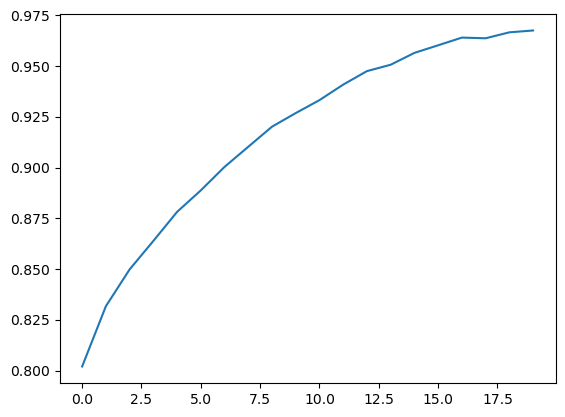

In [149]:
x = list(dict.keys())
y = list(dict.values())

plt.plot(x,y)

In [279]:
cleaned = pd.read_csv('/Users/damienlo/Desktop/clean_meta.csv')
cleaned = cleaned[['gender','age','age_bin']]
cleaned

,gender,age,age_bin
0,0.0,67,3
1,1.0,27,1
2,1.0,46,2
3,1.0,43,2
4,1.0,48,2
...,...,...,...
59680,0.0,52,2
59681,0.0,51,2
59682,1.0,52,2
59683,0.0,15,1


In [257]:
splits = np.array_split(cleaned,5)
n=1
for split in splits:
    split.to_csv(f'/Users/damienlo/Desktop/tempRes/trainY{n}.csv')
    print(split.shape)
    n+=1

(11937, 3)
(11937, 3)
(11937, 3)
(11937, 3)
(11937, 3)


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [289]:
# Sequential split: first 80% train, last 20% test
n_total = len(cleaned)
n_train = int(0.8 * n_total)

# Slice
train_split = cleaned.iloc[:n_train]
test_split = cleaned.iloc[n_train:]

# Save to CSV
train_split.to_csv('/Users/damienlo/Desktop/tempRes/train.csv', index=True)
test_split.to_csv('/Users/damienlo/Desktop/tempRes/test.csv', index=True)

# Print shapes
print(f"Train shape: {train_split.shape}")
print(f"Test shape: {test_split.shape}")

Train shape: (47748, 3)
Test shape: (11937, 3)
